<a href="https://colab.research.google.com/github/KristineYW/Unit-1-Build/blob/master/Build_Week_1_Vis_3_4_CD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [0]:
# Read in dataset

ch_d = pd.read_csv('https://raw.githubusercontent.com/KristineYW/Unit-1-Build/master/causes-of-death-in-children.csv')

ch_d.head()

,Entity,Code,Year,Malaria (deaths),HIV/AIDS (deaths),Preterm birth complications (deaths),Whooping cough (deaths),Lower respiratory infections (deaths),Congenital birth defects (deaths),Measles (deaths),Neonatal sepsis & infections (deaths),Birth asphyxia and trauma (deaths),Drowning (deaths),Tuberculosis (deaths),Diarrheal diseases (deaths),Cancers (deaths),Meningitis (deaths),Nutritional deficiencies (deaths),Other neonatal disorders (deaths)
0,Afghanistan,AFG,1990,117.787829,7.498654,8483.408122,1124.553646,19713.086217,7344.939318,10851.200381,490.274042,2383.484928,952.331865,1297.794487,8659.475236,258.367519,5473.605334,1506.484835,5667.359368
1,Afghanistan,AFG,1991,123.219140,8.965332,8599.301603,1230.927545,19174.882442,7185.381787,11197.293793,496.405430,2441.173769,911.374751,1236.183360,8426.787563,252.613202,5332.225337,1454.065661,5744.215629
2,Afghanistan,AFG,1992,125.663504,12.993281,9347.794346,1299.032836,19907.997133,7481.088853,11772.826326,540.735172,2690.812206,896.176995,1257.489351,8749.387051,257.074124,5527.464485,1498.632928,6236.912651
3,Afghanistan,AFG,1993,155.203295,17.952750,12753.995223,1459.329955,24732.410838,9501.380243,12282.008121,733.405365,3715.201390,969.520533,1483.454933,11710.601455,298.682199,6778.601437,1799.184564,8469.547312
4,Afghanistan,AFG,1994,198.951854,21.288766,13862.161128,1844.931772,29035.079800,10858.293500,13343.653435,816.191459,4077.710931,1167.391417,1814.913734,13085.336308,357.944962,8066.119569,2222.462913,9379.303256


In [0]:
# Remove all rows that do not pertain to the US

ch_d = ch_d.loc[ch_d['Code']=='USA']

ch_d.head()

,Entity,Code,Year,Malaria (deaths),HIV/AIDS (deaths),Preterm birth complications (deaths),Whooping cough (deaths),Lower respiratory infections (deaths),Congenital birth defects (deaths),Measles (deaths),Neonatal sepsis & infections (deaths),Birth asphyxia and trauma (deaths),Drowning (deaths),Tuberculosis (deaths),Diarrheal diseases (deaths),Cancers (deaths),Meningitis (deaths),Nutritional deficiencies (deaths),Other neonatal disorders (deaths)
6076,United States,USA,1990,NaN,362.946087,11620.392572,8.588814,1635.913226,9389.587952,18.161524,893.021764,2763.798999,749.729570,17.117167,161.481894,866.376424,811.466625,27.215834,3075.754425
6077,United States,USA,1991,NaN,383.449561,11064.483936,7.747370,1535.296153,8975.466296,6.246960,878.247842,2655.940097,737.269759,15.851765,167.086152,859.627030,611.934378,26.227960,2858.334181
6078,United States,USA,1992,NaN,399.554773,10441.392120,8.105493,1423.639281,8465.900759,1.423512,858.722357,2549.637368,701.948045,14.562346,169.544542,844.227276,558.960979,24.776121,2629.154946
6079,United States,USA,1993,NaN,425.886905,10165.307262,8.434532,1383.627507,8368.012440,0.202186,846.778920,2504.492244,692.971897,13.538472,181.139857,833.825006,539.544713,24.335223,2504.526630
6080,United States,USA,1994,NaN,427.732609,9782.921992,8.247758,1290.416698,8004.439495,0.580205,840.652661,2434.577431,657.460682,11.841905,192.683480,804.230274,528.571573,22.044427,2357.698209


In [0]:
# Fill NaN values with 0

ch_d = ch_d.fillna(0)
ch_d.columns = ['Entity','Code','Year','Malaria','HIV/AIDS','Preterm Birth',
                'Whooping Cough','Lower Respiratory Infections','Congenital Birth Defects','Measles',
                'Neonatal Sepsis','Birth Asphyxia','Drowning','Tuberculosis','Diarrheal Diseases',
                'Cancers','Meningitis','Nutritional Deficiencies','Other Disorders']

ch_d.head()

,Entity,Code,Year,Malaria,HIV/AIDS,Preterm Birth,Whooping Cough,Lower Respiratory Infections,Congenital Birth Defects,Measles,Neonatal Sepsis,Birth Asphyxia,Drowning,Tuberculosis,Diarrheal Diseases,Cancers,Meningitis,Nutritional Deficiencies,Other Disorders
6076,United States,USA,1990,0.0,362.946087,11620.392572,8.588814,1635.913226,9389.587952,18.161524,893.021764,2763.798999,749.729570,17.117167,161.481894,866.376424,811.466625,27.215834,3075.754425
6077,United States,USA,1991,0.0,383.449561,11064.483936,7.747370,1535.296153,8975.466296,6.246960,878.247842,2655.940097,737.269759,15.851765,167.086152,859.627030,611.934378,26.227960,2858.334181
6078,United States,USA,1992,0.0,399.554773,10441.392120,8.105493,1423.639281,8465.900759,1.423512,858.722357,2549.637368,701.948045,14.562346,169.544542,844.227276,558.960979,24.776121,2629.154946
6079,United States,USA,1993,0.0,425.886905,10165.307262,8.434532,1383.627507,8368.012440,0.202186,846.778920,2504.492244,692.971897,13.538472,181.139857,833.825006,539.544713,24.335223,2504.526630
6080,United States,USA,1994,0.0,427.732609,9782.921992,8.247758,1290.416698,8004.439495,0.580205,840.652661,2434.577431,657.460682,11.841905,192.683480,804.230274,528.571573,22.044427,2357.698209


In [0]:
'''
Combine all non-vaccination-treatable diseases pertinent to the US into a 
separate column under "All Other Diseases"
'''
sum = ch_d['Malaria'] + ch_d['HIV/AIDS'] + ch_d['Preterm Birth'] + ch_d['Congenital Birth Defects']+ ch_d['Neonatal Sepsis']+ ch_d['Birth Asphyxia']+ ch_d['Drowning']+ ch_d['Cancers']+ ch_d['Nutritional Deficiencies']+ ch_d['Other Disorders']

ch_d['All Other Diseases'] = sum

ch_d.head()


,Entity,Code,Year,Malaria,HIV/AIDS,Preterm Birth,Whooping Cough,Lower Respiratory Infections,Congenital Birth Defects,Measles,Neonatal Sepsis,Birth Asphyxia,Drowning,Tuberculosis,Diarrheal Diseases,Cancers,Meningitis,Nutritional Deficiencies,Other Disorders,All Other Diseases
6076,United States,USA,1990,0.0,362.946087,11620.392572,8.588814,1635.913226,9389.587952,18.161524,893.021764,2763.798999,749.729570,17.117167,161.481894,866.376424,811.466625,27.215834,3075.754425,29748.823628
6077,United States,USA,1991,0.0,383.449561,11064.483936,7.747370,1535.296153,8975.466296,6.246960,878.247842,2655.940097,737.269759,15.851765,167.086152,859.627030,611.934378,26.227960,2858.334181,28439.046663
6078,United States,USA,1992,0.0,399.554773,10441.392120,8.105493,1423.639281,8465.900759,1.423512,858.722357,2549.637368,701.948045,14.562346,169.544542,844.227276,558.960979,24.776121,2629.154946,26915.313766
6079,United States,USA,1993,0.0,425.886905,10165.307262,8.434532,1383.627507,8368.012440,0.202186,846.778920,2504.492244,692.971897,13.538472,181.139857,833.825006,539.544713,24.335223,2504.526630,26366.136527
6080,United States,USA,1994,0.0,427.732609,9782.921992,8.247758,1290.416698,8004.439495,0.580205,840.652661,2434.577431,657.460682,11.841905,192.683480,804.230274,528.571573,22.044427,2357.698209,25331.757781


In [0]:
'''
Remove all non-vaccination-treatable diseases since they are already added in the 
All Other Diseases column above
'''

ch_d_clean = ch_d.drop(['Malaria','HIV/AIDS','Preterm Birth','Congenital Birth Defects',
                        'Neonatal Sepsis','Birth Asphyxia','Drowning','Cancers',
                        'Nutritional Deficiencies','Other Disorders'], axis=1)

ch_d_clean.head()

,Entity,Code,Year,Whooping Cough,Lower Respiratory Infections,Measles,Tuberculosis,Diarrheal Diseases,Meningitis,All Other Diseases
6076,United States,USA,1990,8.588814,1635.913226,18.161524,17.117167,161.481894,811.466625,29748.823628
6077,United States,USA,1991,7.747370,1535.296153,6.246960,15.851765,167.086152,611.934378,28439.046663
6078,United States,USA,1992,8.105493,1423.639281,1.423512,14.562346,169.544542,558.960979,26915.313766
6079,United States,USA,1993,8.434532,1383.627507,0.202186,13.538472,181.139857,539.544713,26366.136527
6080,United States,USA,1994,8.247758,1290.416698,0.580205,11.841905,192.683480,528.571573,25331.757781


In [0]:
ch_d_clean.dtypes


Entity                           object
Code                             object
Year                              int64
Whooping Cough                  float64
Lower Respiratory Infections    float64
Measles                         float64
Tuberculosis                    float64
Diarrheal Diseases              float64
Meningitis                      float64
All Other Diseases              float64
dtype: object

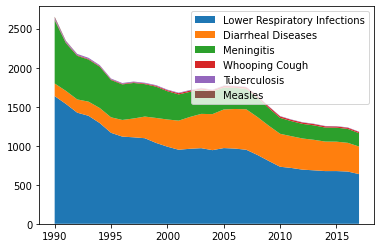

In [0]:
# Graph data using stacked area chart 

import seaborn as sns

plt.stackplot(ch_d_clean['Year'],ch_d_clean['Lower Respiratory Infections'],
              ch_d_clean['Diarrheal Diseases'],ch_d_clean['Meningitis'],
              ch_d_clean['Whooping Cough'],ch_d_clean['Tuberculosis'],
              ch_d['Measles'],labels=['Lower Respiratory Infections','Diarrheal Diseases','Meningitis','Whooping Cough',
                      'Tuberculosis','Measles'])

plt.legend(loc='upper right')
plt.show()

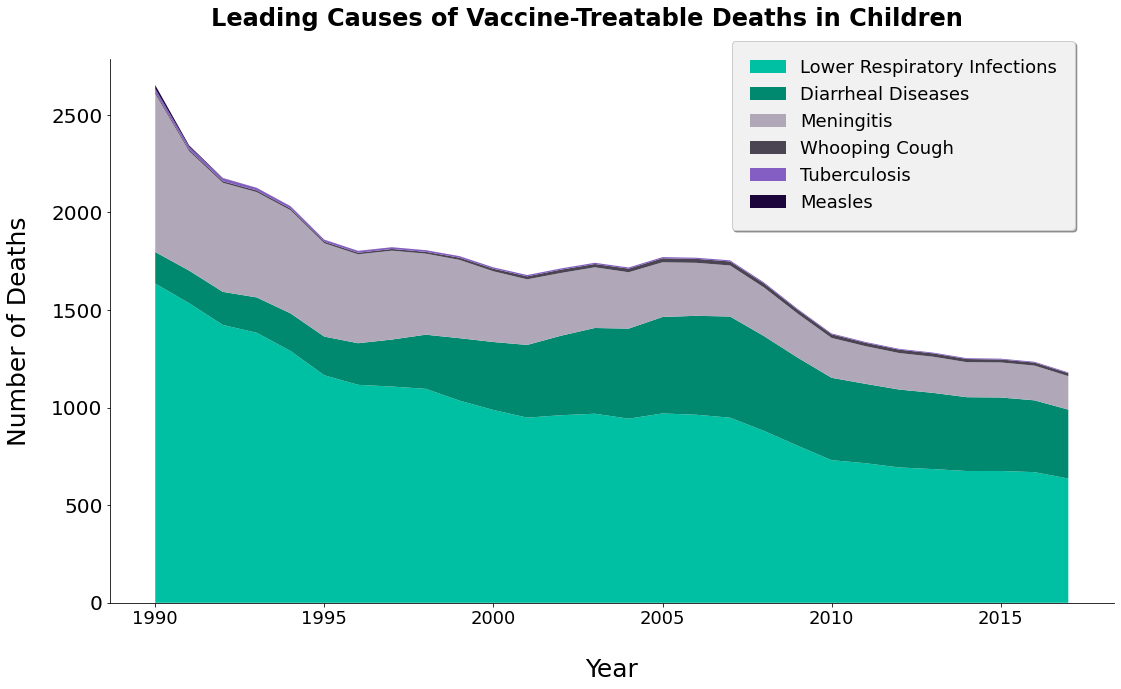

In [0]:

labels = ['Lower Respiratory Infections','Diarrheal Diseases','Meningitis',
          'Whooping Cough','Tuberculosis','Measles']



fig, ax = plt.subplots(figsize=(18,10))
ax.stackplot(ch_d_clean['Year'],ch_d_clean['Lower Respiratory Infections'],
              ch_d_clean['Diarrheal Diseases'],ch_d_clean['Meningitis'],
              ch_d_clean['Whooping Cough'],ch_d_clean['Tuberculosis'],
              ch_d['Measles'], labels=labels, colors=('#00C0A3','#00896F','#B0A8B9',
                                                      '#4B4453','#845EC2','#1C053a'))

ax.set_title("Leading Causes of Vaccine-Treatable Deaths in Children", color='black', 
             weight='bold', fontsize=24, x=.475, y=1.05)


ax.set_yticklabels([0,500,1000,1500,2000,2500], color='#000000', fontsize=20)
ax.set_xticklabels([0,1990,1995,2000,2005,2010,2015,2020], color='#000000', fontsize=18)

ax.set_xlabel('Year',fontsize=25,labelpad=30)
ax.set_ylabel('Number of Deaths',fontsize=25,labelpad=20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(fontsize=18,bbox_to_anchor=(.97,1.05),shadow=True,facecolor='#f1f1f1',borderpad=1)

plt.show();

In [0]:
ch_d_clean_2 = ch_d_clean.set_index(keys='Year')
ch_d_clean_2 = ch_d_clean_2.drop(['All Other Diseases'], axis=1)


ch_d_clean_2.head()

,Entity,Code,Whooping Cough,Lower Respiratory Infections,Measles,Tuberculosis,Diarrheal Diseases,Meningitis
Year,,,,,,,,
1990,United States,USA,8.588814,1635.913226,18.161524,17.117167,161.481894,811.466625
1991,United States,USA,7.747370,1535.296153,6.246960,15.851765,167.086152,611.934378
1992,United States,USA,8.105493,1423.639281,1.423512,14.562346,169.544542,558.960979
1993,United States,USA,8.434532,1383.627507,0.202186,13.538472,181.139857,539.544713
1994,United States,USA,8.247758,1290.416698,0.580205,11.841905,192.683480,528.571573


In [0]:
ch_d_clean_2=ch_d_clean_2.loc[[1990,1995,2000,2005,2010,2015,2017]]

ch_d_clean_2.head(10)

,Entity,Code,Whooping Cough,Lower Respiratory Infections,Measles,Tuberculosis,Diarrheal Diseases,Meningitis
Year,,,,,,,,
1990,United States,USA,8.588814,1635.913226,18.161524,17.117167,161.481894,811.466625
1995,United States,USA,8.148322,1165.840270,0.183915,10.194441,198.200700,478.125705
2000,United States,USA,13.083106,987.943643,0.046728,7.055266,348.344650,362.314711
2005,United States,USA,20.535206,970.134906,0.032740,5.940921,494.284571,280.299353
2010,United States,USA,18.811986,730.791280,0.028673,4.241182,422.069157,204.200072
2015,United States,USA,15.246474,675.495437,0.075909,4.001932,376.526878,179.547238
2017,United States,USA,15.002648,636.699016,0.062201,3.856037,353.158622,171.538460


TypeError: ignored

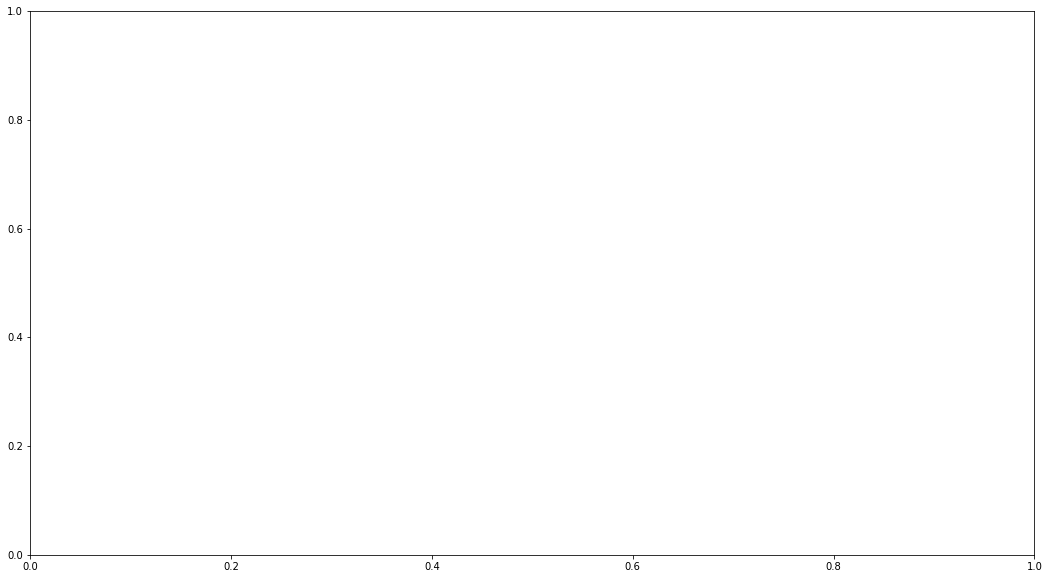

In [0]:
labels = [1990,1995,2000,2005,2010,2015,2017]
one = ch_d_clean_2.loc[[1990]]
two = ch_d_clean_2.loc[[1995]]
three = ch_d_clean_2.loc[[2000]]
four = ch_d_clean_2.loc[[2005]]
five = ch_d_clean_2.loc[[2010]]
six = ch_d_clean_2.loc[[2015]]
seven = ch_d_clean_2.loc[[2017]]

fig, ax = plt.subplots(figsize=(18,10))

ax.bar(labels,one,yerr=one)


plt.show();

TypeError: ignored

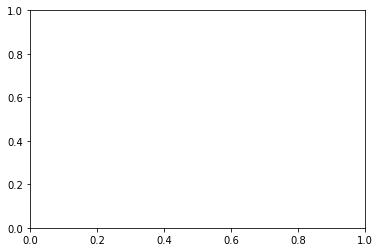

In [0]:
labels = [1990,1995,2000,2005,2010,2015,2017]

fig,ax = plt.subplots()

ax.bar(labels, height=ch_d_clean_2,width=.8)

plt.show()

In [0]:
ch_d_clean_2 = ch_d_clean_2[['Entity','Code','Lower Respiratory Infections','Diarrheal Diseases',
                             'Meningitis','Tuberculosis','Whooping Cough','Measles']]

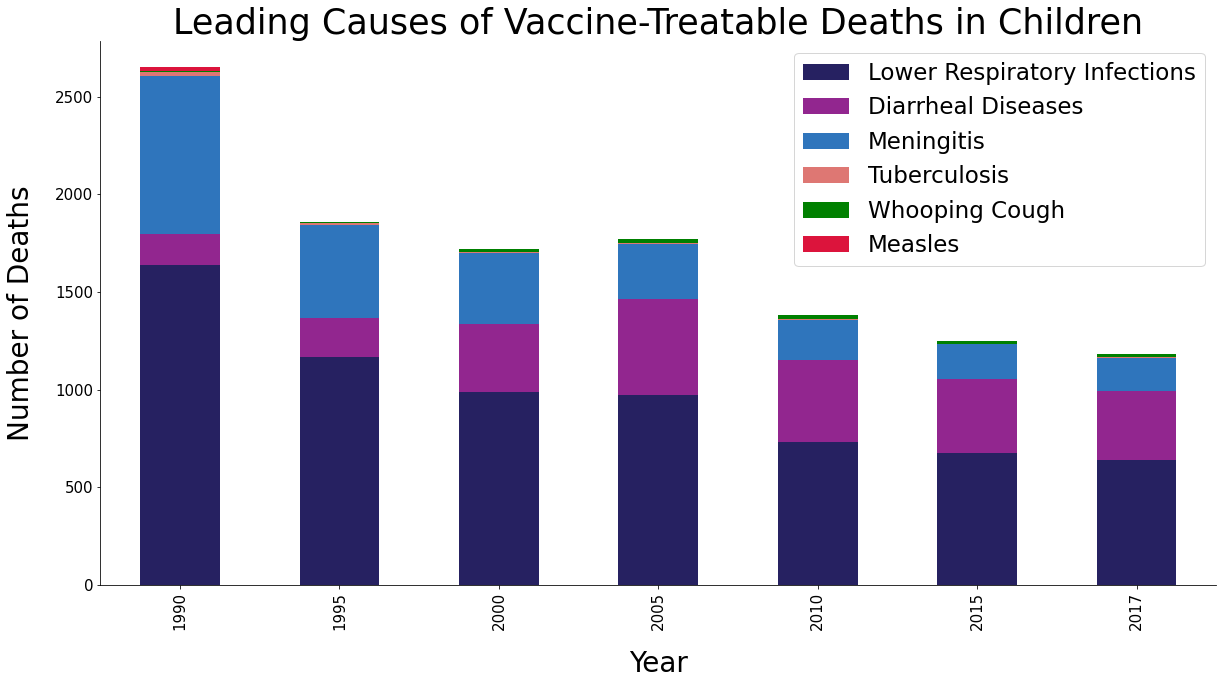

In [0]:
import seaborn as sns

ch_d_clean_2.plot(kind='bar',stacked=True, figsize=(20,10),color=("#262161",
                                                                  "#92268f","#2f75bc","#de7773","green","crimson"))


plt.title("Leading Causes of Vaccine-Treatable Deaths in Children",fontsize=35)

plt.legend(fontsize=23)

plt.ylabel('Number of Deaths', fontsize=28,labelpad=20)
plt.xlabel('Year', fontsize=28,labelpad=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

In [0]:
ax = ch_d_clean_2.plot(ch_d_clean_2, kind="bar")
df.plot(ch_d_clean_2["Years"], y=ch_d_clean_2["Lower Respiratory Infections"], kind="bar", ax=ax, color="C2")

plt.show()

ValueError: ignored